<a href="https://colab.research.google.com/github/lightsixer/P2deeplearning/blob/dev/models/test_model_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Paul's model

In [2]:
from keras.models import load_model

rand_model_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/RandomSelection_BirdPred2.h5"

model = load_model(rand_model_path)

Load Tiru's model

In [3]:
bird_model_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/bird_pred.h5"
model2 = load_model(bird_model_path)

In [ ]:
model2

Use Tiru's model to predict

In [4]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predictbird(img_path):
  img_width, img_height = 884, 322

  img = image.load_img(img_path, target_size=(img_height, img_width))
  x = image.img_to_array(img)
  print(x.shape)
  x = np.expand_dims(x, axis=0)
  print(x.shape)
  x /= 255.
  print(x.shape)

  plt.imshow(x[0])
  plt.axis('off')
  plt.show()

  pred = model2.predict(x)
  print(pred)
  y_classes = pred.argmax(axis=-1)
  print(y_classes)
  return np.argmax(pred)

Use Paul's model to predict

In [5]:
def rnd_predictbird(img_path):
  img_width, img_height = 884, 322

  img = image.load_img(img_path, color_mode="grayscale", target_size=(img_height, img_width))
  x = image.img_to_array(img)
  print(x.shape)
  x = np.expand_dims(x, axis=0)
  print(x.shape)
  x /= 255.
  print(x.shape)

  plt.imshow(x[0])
  plt.axis('off')
  plt.show()

  pred = model.predict(x)
  print(pred)
  y_classes = pred.argmax(axis=-1)
  print(y_classes)
  return np.argmax(pred)

Predict an image from the random reserved set using Paul's model

(322, 884, 1)
(1, 322, 884, 1)
(1, 322, 884, 1)


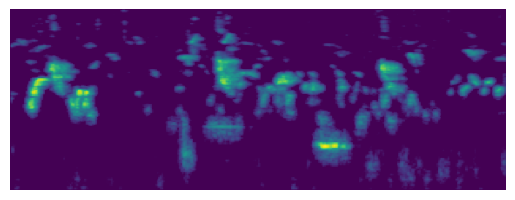

1/1 [==============================] - 1s 742ms/step
[[2.78038584e-07 2.53573584e-09 3.95142469e-12 1.16631210e-11
  9.98845906e-04 7.27433735e-06 1.06788415e-04 4.65565475e-10
  9.18542743e-01 8.03440809e-02]]
[8]
Random set prediction:  somgre1


In [6]:
rand_classes = ['afbfly1', 'afdfly1', 'chespa1', 'chewea1', 'grywrw1', 'luebus1', 'nobfly1', 'rocmar2', 'somgre1', 'somtit4']

rnd_test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/random10_prep_data/reserved/afbfly1/XC530245_4.png"

rnd_prediction = rand_classes[rnd_predictbird(rnd_test_img_path)]
print("Random set prediction: ", rnd_prediction)

Predict an image from the filtered test set using Tiru's model

(322, 884, 3)
(1, 322, 884, 3)
(1, 322, 884, 3)


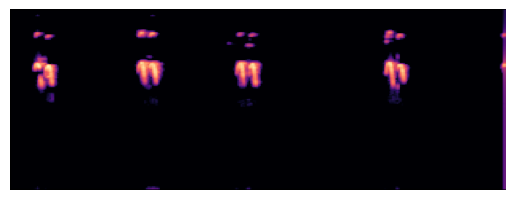

1/1 [==============================] - 1s 685ms/step
[[4.7590729e-07 6.3511481e-09 2.5621404e-12 1.3411142e-11 1.4318238e-12
  1.9594585e-15 8.5868361e-11 2.0381246e-06 1.5905750e-06 9.9999595e-01]]
[9]
Filtered set prediciton:  woosan


In [27]:
filtered_classes = ['barswa', 'cohmar1', 'combuz1', 'comsan', 'eaywag1', 'eubeat1', 'litegr', 'thrnig1', 'wlwwar', 'woosan']

#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/barswa/XC142794_5.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/cohmar1/XC27278_5.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/combuz1/XC120413_1.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/comsan/XC25127_1.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/eaywag1/XC140811_1.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/eubeat1/XC135682_2.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/litegr/XC309390_1.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/thrnig1/XC25660_1.png"
#test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/wlwwar/XC128357_1.png"
test_img_path = "/content/drive/MyDrive/P2_DeepLearning/birdclef-2023/prep_data/test/woosan/XC140651_1.png"

filtered_prediction = filtered_classes[predictbird(test_img_path)]
print("Filtered set prediciton: ", filtered_prediction)